# Pandas: Selecionando e agrupando dados
Esse notebook tem por objetivo conter todos os códigos realizados para estudar a biblioteca pandas

## **Objetivo:** Analisar os dados de emissões de gases do efeito estufa no Brasil.

## **O que irá conter nesse notebook:**
- Ler e escrever arquivos nos formatos CSV, EXCEL, JSON, HTML e XML
- Criar um banco e dados local
- Compreender como escrever no banco de dados
- Realizar consultas SQL
- Atualizar informações

# Códigos

## Bibliotecas

In [49]:
import pandas as pd
import plotly.express as px

## 1 - Conhecendo os dados

### 1.1 - Leitura dos dados

#### Lendo a base de dados através do meu drive
A base de dados está disponível no site da [SEEG](https://seeg.eco.br/), mas para conveniência, eu a salvei no Google Drive.

Essa base de dados abrange as emissões de gases do Brasil desde 1970 até 2022.

Ela possui colunas como Nível 1, Nível 2, Nível 3, Nível 4, Nível 5 e Nível 6, o que permite uma análise detalhada das emissões por esses setores.

Também inclui a coluna Estado, possibilitando a análise das emissões por estado.



In [2]:
url = '/content/drive/MyDrive/Colab Notebooks/formacao-data-science/pandas/codes/selecinando-agrupando-dados/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx'

emissoes_gases = pd.read_excel(url, sheet_name='GEE Estados')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#### Explorando

In [3]:
emissoes_gases.head(2)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0


In [4]:
emissoes_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### 1.2 - Ajustando dados
Foi solicitado que filtrasse a coluna de `Emissão / Remoção / Bunker` para que contenha apenas as emissões cadastradas.

Com o código abaixo percebemos que dentro da coluna `Emissão / Remoção / Bunker` temos os valores:
- Emissão
- Emissão NCI
- Remoção NCI
- Bunker
- Remoção

Onde as remoções são os dados referentes à retirada de gases estufa da atmosfera. Já os NCI são dados não contemplados. Por fim, Bunkers são emissões de transporte marítmo e aéreo. Por isso, esse todos não são emissões dirtas dos estados, assim temos que filtrar.

In [5]:
emissoes_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

#### Primeiro vamos verificar os dados de remoção, para ver se todos eles são de fato de retirada de gases estufa.


Para isso, basta ver se alguma coluna é maior que zero, para isso utiizaremos a função `max()`. Caso alguma coluna seja maior que zera significa que está errado

In [8]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI','Remoção']), 1970:2021].max()

,0
1970,0.0
1971,0.0
1972,0.0
1973,0.0
1974,0.0
1975,0.0
1976,0.0
1977,0.0
1978,0.0
1979,0.0


#### Segundo vamos verificar se algum tipo de Bunker corresponde a algum estado (Não pode permitir, pois elas são feitas por nações)

In [9]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()

array([nan], dtype=object)

#### Por último vamos filtrar só por emissão que é o nosso alvo e vamos excluir a coluna `Emissão / Remoção / Bunker`, já que ela só vai conter 1 tipo de dados

In [10]:
emissoes_gases_estados = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissoes_gases_estados = emissoes_gases_estados.drop(columns= 'Emissão / Remoção / Bunker')
emissoes_gases_estados.head(2)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6,897.6
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0


### 1.3 - Desafios

1. Encontre os valores únicos das colunas "Nível 1 - Setor" e "Estado" para identificar as atividades econômicos presentes na base de dados e se todos os Estados do Brasil estão presentes no DF

In [11]:
emissoes_gases['Nível 1 - Setor'].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [12]:
estados_unicos = emissoes_gases_estados['Estado'].unique()
print(estados_unicos)
len(estados_unicos)

['SP' 'BA' 'RJ' 'MG' 'SE' 'PR' nan 'RO' 'AM' 'PA' 'TO' 'MA' 'PI' 'CE' 'RN'
 'PB' 'PE' 'AL' 'MT' 'MS' 'GO' 'DF' 'ES' 'SC' 'RS' 'AC' 'AP' 'RR']


28

2. Filtre o DataFrame somente com dados dos Estados do Sul

In [13]:
emissoes_gases_sul = emissoes_gases[emissoes_gases['Estado'].isin(['RS', 'SC', 'PR'])]
emissoes_gases_sul['Estado'].unique()

array(['PR', 'SC', 'RS'], dtype=object)

3. Filtre o DF somente com os dados de "Mudança de Uso da Terra e Floresta" que sejam do estado de Amazona

In [14]:
emissoes_gases_AM_terra = emissoes_gases[(emissoes_gases['Estado'] == 'AM') & (emissoes_gases['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta')]
print(emissoes_gases_AM_terra['Estado'].unique())
print(emissoes_gases_AM_terra['Nível 1 - Setor'].unique())

['AM']
['Mudança de Uso da Terra e Floresta']


4. Encontre o valor máximo de emissões do ano de 2021 para os dados de 'Agropecuária' no estado do Pará

In [15]:
emissoes_gases_max_PA_agro = emissoes_gases.loc[(emissoes_gases['Estado'] == 'PA') & (emissoes_gases['Nível 1 - Setor'] == 'Agropecuária'), 2021].max()
print(emissoes_gases_max_PA_agro)

36856969.7986


## 2 - Agrupamento de dados

### 2.1 - Remodelando o DataFrame
O DataFrame está no formato `Wide`, onde as tabelas têm uma única linha de cabeçalho contendo diversas colunas, e são uteis para armazenar informações que possuem muitos atributos.

Porém nosso objetivo é passar para o formato `Long` onde as tabelas armazenam cada observação em linhas separadas. Ao invés de ter uma única linha de cabeçalho contendo todas as colunas, temos duas colunas principais de informação, uma para os nome da variáveis e outra com os valores.

In [16]:
colunas_info = list(emissoes_gases_estados.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [17]:
colunas_emissao = list(emissoes_gases_estados.loc[:, 1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para isso utiilizaremos o método `melt()` do pandas.

A função `melt` é usada para transformar um DataFrame de formato largo para formato longo, reestruturando-o de modo que algumas de suas colunas se tornem variáveis e outras se tornem valores dessas variáveis.

- O primeiro argumento `id_vars` especifica quais colunas devem ser mantidas na sua forma original. Essas colunas geralmente contêm informações identificadoras ou descritivas que não serão transformadas em valores.
  
- O segundo argumento `value_vars` indica quais colunas devem ser "derretidas" (ou "melted"), ou seja, quais colunas do DataFrame original devem ser transformadas em valores sob uma nova coluna.
  
- O terceiro argumento `var_name` é usado para especificar o nome da nova coluna que conterá os nomes das colunas derretidas (ou variáveis que serão transformadas em valores). No exemplo dado, `'Ano'` será o nome da coluna que conterá as informações dos anos.

- O quarto argumento `value_name` especifica o nome da nova coluna que conterá os valores que foram derretidos das colunas especificadas em `value_vars`. No exemplo dado, `'Emissão'` será o nome da coluna que conterá os valores de emissão de gases.


In [18]:
emissoes_por_ano = emissoes_gases_estados.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissão')
emissoes_por_ano.head(3)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0


### 2.2 - Agrupando por gases
Somando a coluna emissão com base nos tipos de "Gás".

Para isso utilizaremos a função `groupby` que irá agrupar as emissões por tipo de gás.

Para visualizar utilizaremos o `.groups` que irá retornar um dicinário onde cada chave é um gás e os valores são as posições das emissões

In [19]:
emissoes_por_ano.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

Para visualizar um grupo específico basta usar a função `get_group()`

In [20]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)').head(2)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.0
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.0


### 2.3 - Análise dos gases

Agrupando por gás e realizando uma soma das emissões por gás

In [21]:
emissoes_por_ano.groupby('Gás')[['Emissão']].sum()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


Ordenando do maior para o menor

In [22]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum().sort_values('Emissão', ascending=False)

Percebemos que as emissões de CO2 representam a maioria das emissões

<Axes: xlabel='Gás'>

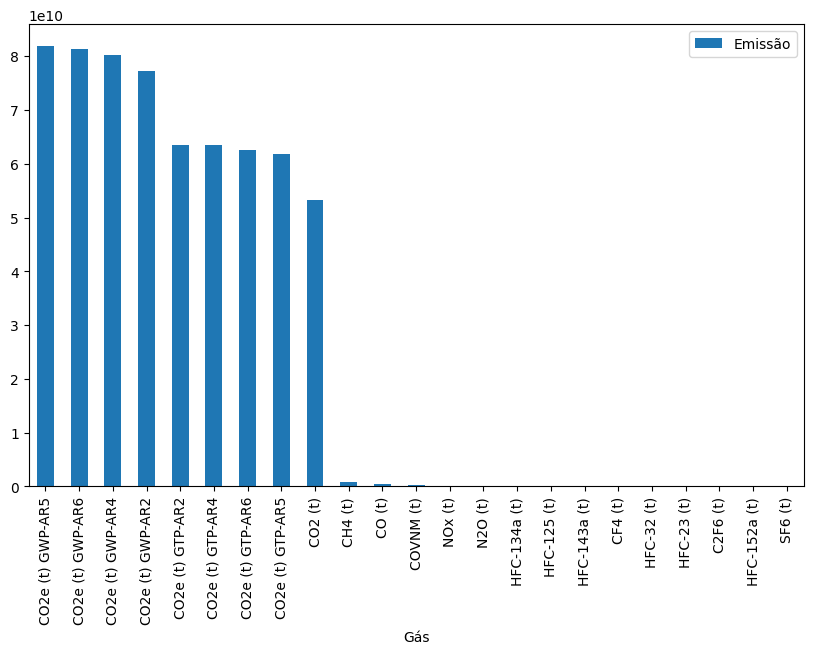

In [23]:
emissao_por_gas.plot(kind = 'bar', figsize = (10 , 6))

Quantos % das emissões o CO2 representa?

In [24]:
emissoes_co2 = emissao_por_gas.iloc[0:9].sum()
emissoes_total = emissao_por_gas.sum()

# Botamos esse iloc no final pois o retorno dessa divisão é uma series
porcentagem = (emissoes_co2/emissoes_total).iloc[0]

print(f"As emissões de CO2 representam {round((porcentagem)*100, 2)}% das emissões totais")

As emissões de CO2 representam 99.74% das emissões totais


### 2.4 - Desafios

1. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para a visualizar o dcionários contendo as chaves de grupos formados e a lista de índices de cada grupo

In [25]:
print(emissoes_por_ano['Nível 1 - Setor'].unique())

emissoes_por_ano.groupby('Nível 1 - Setor').groups

['Processos Industriais' 'Agropecuária' 'Energia' 'Resíduos '
 'Mudança de Uso da Terra e Floresta']


{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 

2. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuára"

In [26]:
emissoes_por_ano.groupby('Nível 1 - Setor').get_group('Agropecuária').head(3)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000


3. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e para dentificar a média de emissão de cada atividade em 2021

In [27]:
emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Nível 1 - Setor')[['Emissão']].mean()

,Emissão
Nível 1 - Setor,
Agropecuária,149793.768835
Energia,72928.637234
Mudança de Uso da Terra e Floresta,690085.511209
Processos Industriais,787101.255789
Resíduos,106106.723386


4. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e para identificar a soma de emissões de cada atividade econômica. Ordene da maior para a menor

In [28]:
emissoes_por_ano.groupby('Nível 1 - Setor')[['Emissão']].sum().sort_values('Emissão', ascending=False)

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


## 3 - Agrupamentos multi-index
Um DataFrame Multi-Index é uma EDA em pandas que permte a criação de um índice hieráquico. Isso permite a organização de dados de forma mais detalhada.

### 3.1 - Emissões de gases por setor
Buscaremos:
- **Os setores econômicos mais poluentes para cada tipo de gás**
- **Gases mais poluentes para cada setor econômico**

In [29]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
# DataFrame MultiIndex
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]


Para descobrir o setor que emite maior quantidade de CO2, podemos realizar uma seleção específica do gás CO2 com o uso do métodos coss-section `xs()`, extraindo a partir disso o valor máximo e índice máximo, com os métodos max() e idmax()

**` .xs() `**: É um método do DataFrame de pandas que retorna uma seção transversal (cross-section) do DataFrame.

**` 'CO2 (t)' `**: É o valor do índice que você deseja selecionar.

**` level=0 `**: Especifica o nível do índice/coluna no qual o valor 'CO2 (t)' deve ser procurado.


In [30]:
gas_por_setor.xs('CO2 (t)', level = 0)

,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [31]:
gas_por_setor.xs('CO2 (t)', level = 0).max()

,0
Emissão,3.733930e+10


In [32]:
gas_por_setor.xs('CO2 (t)', level = 0).idxmax()

,0
Emissão,Mudança de Uso da Terra e Floresta


### 3.2 - Emissão máxima

#### Os setores econômicos mais poluentes para cada tipo de gás

Agrupando por gás para achar os setores que mais emitem um determinado gás

In [33]:
tabela_sumarizada_gas = gas_por_setor.groupby('Gás').idxmax()

Agrupando por gás para achar a maior emissão daquele gás

In [34]:
valores_max = gas_por_setor.groupby('Gás').max().values

Unindo as informações, para isso utilizaremos a função `insert()`

O primeiro argumento é referente a posição da coluna em que ela entrará. Como a tabela_sumarizada já possui uma coluna (Que é a coluna 0) devemos colocar 1

O segundo argumento é o nome da coluna

O terceiro argumento é os valores a serem inseridos

In [35]:
tabela_sumarizada_gas.insert(1, 'Quantidade de emissões', valores_max)

In [36]:
tabela_sumarizada_gas

,Emissão,Quantidade de emissões
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


#### Gases mais poluentes para cada setor econômico

In [37]:
tabela_sumarizada_setor = gas_por_setor.groupby('Nível 1 - Setor').idxmax()

In [38]:
valores_max_setor = gas_por_setor.groupby('Nível 1 - Setor').max().values

In [39]:
tabela_sumarizada_setor.insert(1, 'Quantidade de emissões', valores_max_setor)

In [40]:
tabela_sumarizada_setor

,Emissão,Quantidade de emissões
Nível 1 - Setor,,
Agropecuária,"(CO2e (t) GWP-AR5, Agropecuária)",2.184388e+10
Energia,"(CO2e (t) GWP-AR6, Energia)",1.385259e+10
Mudança de Uso da Terra e Floresta,"(CO2e (t) GWP-AR5, Mudança de Uso da Terra e F...",4.051523e+10
Processos Industriais,"(CO2e (t) GWP-AR6, Processos Industriais)",3.352064e+09
Resíduos,"(CO2e (t) GWP-AR5, Resíduos )",2.310099e+09


### 3.3 - Emissão por ano

Agrupando a colunas ano

<Axes: xlabel='Ano'>

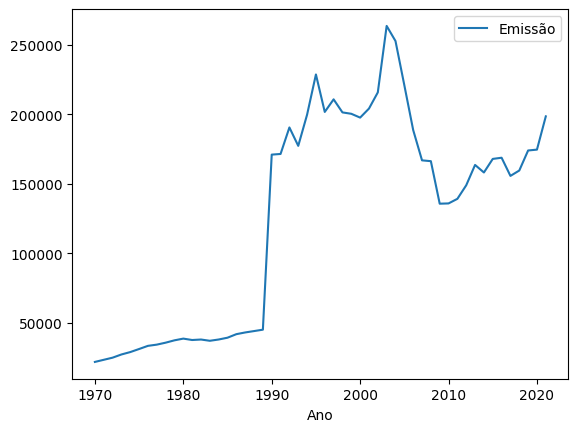

In [41]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot()

Vendo o ano de emissão média máxima

In [42]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().idxmax()

,0
Emissão,2003


In [43]:
meida_emissao_ano_gas = emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean().reset_index()
meida_emissao_ano_gas

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [44]:
meida_emissao_ano_gas = meida_emissao_ano_gas.pivot_table(index = 'Ano', columns='Gás', values='Emissão')
meida_emissao_ano_gas

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


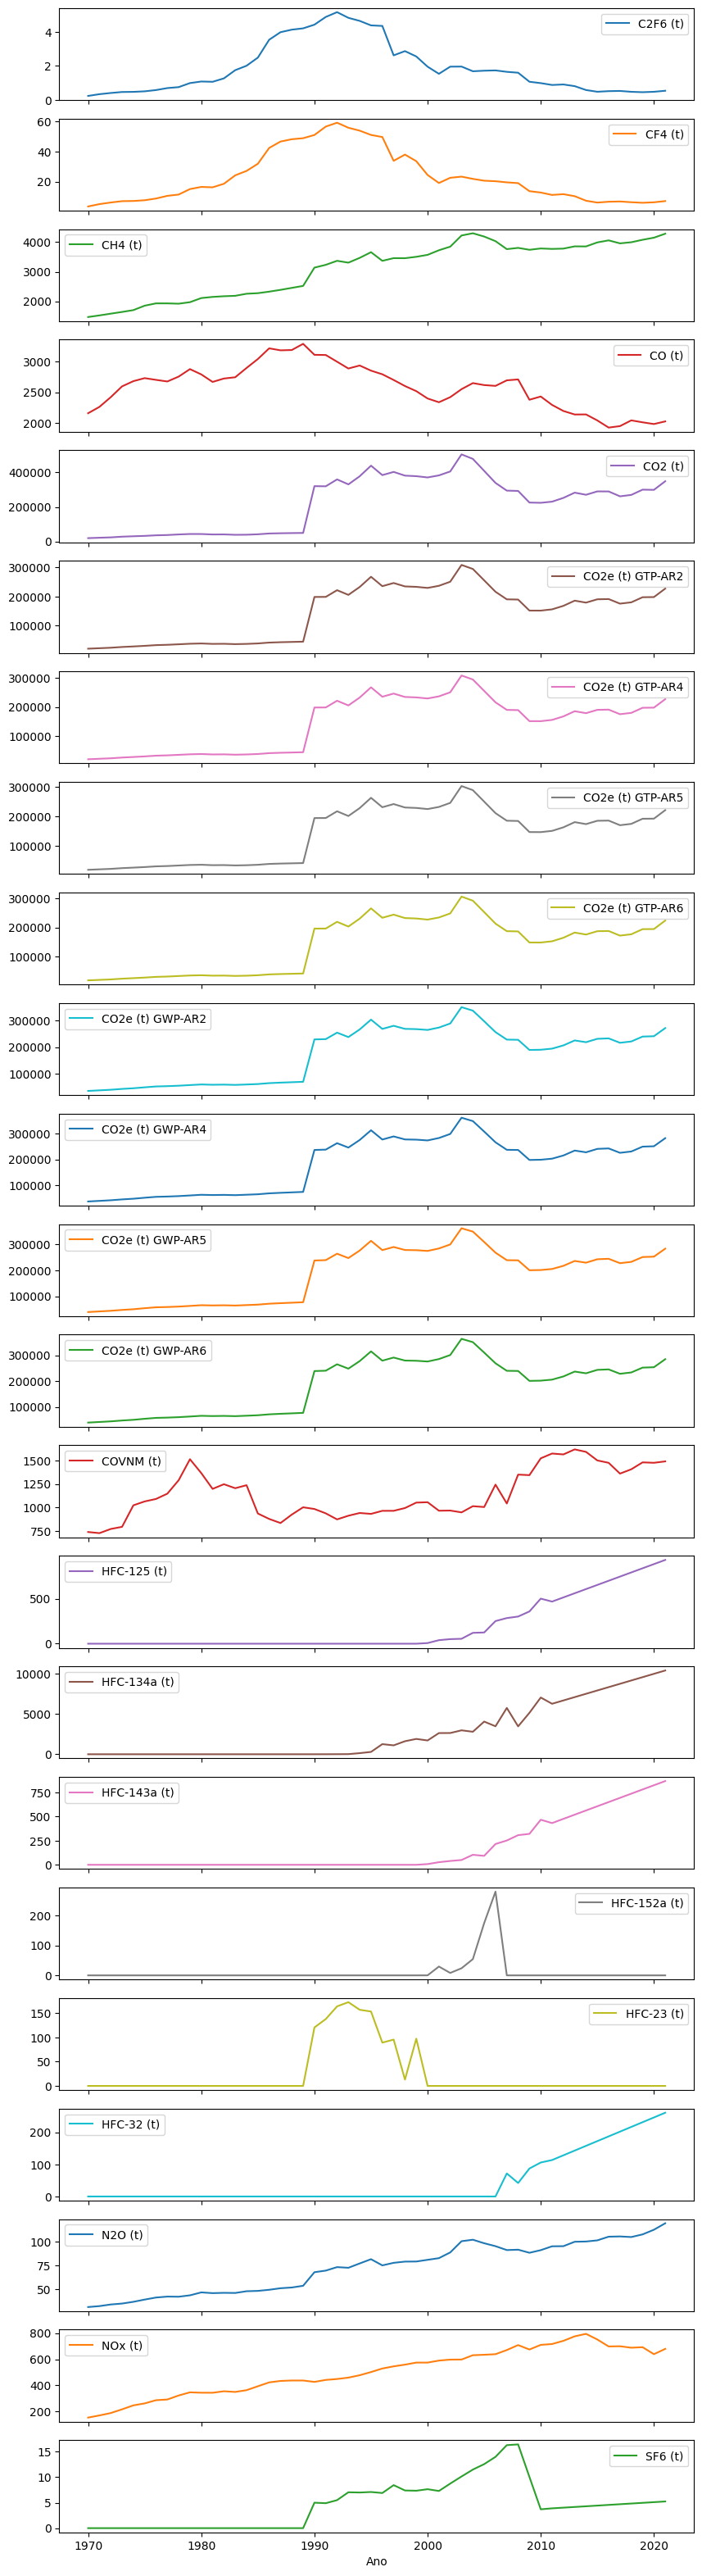

In [45]:
meida_emissao_ano_gas.plot(subplots=True, figsize = (10, 40));

## 4 - Unindo dados
Nessa seção iremos fazer a emissão per capita, que é basicamente a emissão total dividido pelo total de pessoas por estados.

Para isso teremos que importar mais uma base de dados.

### 4.1 - População por Estados

In [46]:
# Pegando a linha 1 e pulando as 34 últimas
populacao_estados = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/formacao-data-science/pandas/codes/selecinando-agrupando-dados/POP2022_Municipios.xls', header = 1, skipfooter= 34)

In [47]:
populacao_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF                 5570 non-null   object
 1   COD. UF            5570 non-null   int64 
 2   COD. MUNIC         5570 non-null   int64 
 3   NOME DO MUNICÍPIO  5570 non-null   object
 4   POPULAÇÃO          5570 non-null   object
dtypes: int64(2), object(3)
memory usage: 217.7+ KB


Percebe-se que a coluna população que deveria ser do tipo inteiro é do tipo objeto. Ao tentarmos converter para inteiro, recebemos o seguinte erro:

In [50]:
# populacao_estados['POPULAÇÃO'].astype(int)

Percebemos que em uma linha temos o valor `461.748(1)` que por conta dos parenteses não pode ser convertido para inteiro. Então temos que filtrar as linhas que possuem esse mesmo problema

In [51]:
# Procura todas as linhas na base de dados na coluna POPULAÇÃO que contai "("
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)].head(3)

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)


### 4.2 - Tratando dados

Criando novas colunas para conter apenas a quantidade da população

In [52]:
# Removendo os parenteses e o ponto
# O método assign() retorna um novo objeto com as colunas originais, com a adição de colunas novas. Ele permite que você crie uma ou mais colunas novas de uma vez
populacao_estados = populacao_estados.assign(
    # O método replace() substitui uma frase especificada por outra frase
      # Nesse primeiro caso estamos fazendo um regex. Como podemos notar os parenteses seguem um formato padrão e o que muda são os números dentro deles
      # Então \d{1,2}\ vai buscar numeros de 1 até 2 dígitos e \() vai buscar os parenteses
      # Depois precisamos botar qual frase vai substituir esse regex e definimos uma strign vazia
    popualcao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
    # Por que nesse caso usamos esse formato e não o mesmo do de cima?
      # Por estarmos criando 2 colunas novas e a segunda vai depender da primeiro temos que fazer dessa forma usando o lambda
      # Usamos o x.loc[:, 'popualcao_sem_parenteses'] para pegar todas as linhas da coluna popualcao_sem_parenteses e removemos o ponto
    populacao = lambda x: x.loc[:, 'popualcao_sem_parenteses'].replace('\.', '', regex = True)
    )

In [53]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)].head(3)

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,popualcao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399


Feito isso a nova coluna `populacao`ainda é do tipo object, precisamos converter ela para o tipo numério

In [54]:
populacao_estados = populacao_estados.astype({'populacao': 'int64'})

In [56]:
populacao_estados = populacao_estados.groupby('UF')[['populacao']].sum().reset_index()

### 4.3 - Unindo os dados

In [55]:
emissoes_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()

In [61]:
dados_agrupado = pd.merge(emissoes_estados, populacao_estados, left_on='Estado', right_on='UF')

In [63]:
# grafico(dataframe, eixo X, eixo Y, texto para ficar em cima dos pontos (Opicional, nesse caso eu botei para aparecer os nomes dos estados), opacity é para a opacidade dos pontos, nesse caso 0 é invisivel)
px.scatter(data_frame = dados_agrupado, x = 'populacao', y = 'Emissão', text = 'Estado', opacity = 0)

In [64]:
dados_agrupado['emissao_per_capita'] = dados_agrupado['Emissão'] / dados_agrupado['populacao']
dados_agrupado = dados_agrupado.sort_values(by= 'emissao_per_capita', ascending=False)

In [65]:
dados_agrupado

,Estado,Emissão,UF,populacao,emissao_per_capita
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928
2,AM,1.189649e+09,AM,3952262,301.004463
26,TO,4.082159e+08,TO,1584306,257.662300
11,MS,5.551278e+08,MS,2833742,195.899220
9,MA,9.476324e+08,MA,6800605,139.345312
8,GO,6.008081e+08,GO,6950976,86.435075


In [66]:
px.bar(data_frame = dados_agrupado, x = 'Estado', y = 'emissao_per_capita')

In [68]:
px.scatter(data_frame = dados_agrupado, x = 'populacao', y = 'Emissão', size = 'emissao_per_capita')